**TASK-3 CAR PRICE PREDICTION WITH MACHINE LEARNING**

The price of a car depends on a lot of factors like the goodwill  of the brand of the car, features of the car,horsepower and the mileage it gives and manymore Car price prediction is one of the major research areas in machine learning .

#PREDICTING CAR PRICE




In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

#DATA CLEANING

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Selling_Price', ylabel='Year'>

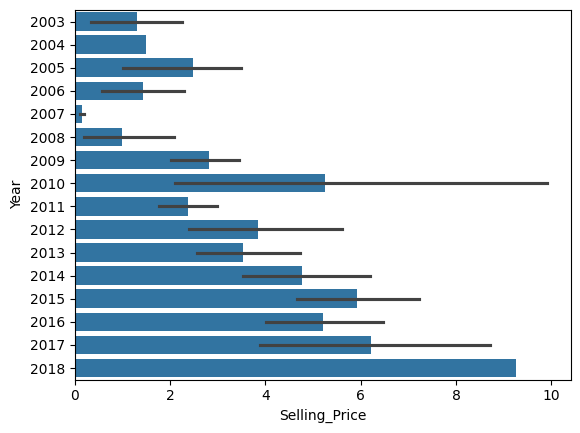

In [12]:
sns.barplot(x='Selling_Price', y='Year',data=df, orient='h')

<Axes: xlabel='Transmission', ylabel='Selling_type'>

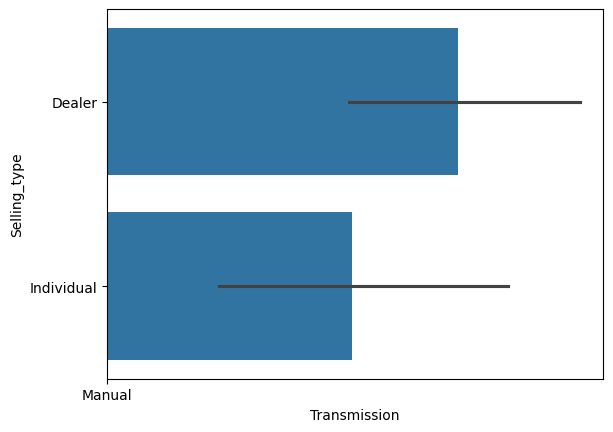

In [13]:
sns.barplot(x='Transmission', y='Selling_type',data=df, orient='h')

#DATA PREPROCESSING

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder

In [15]:
cat_df=df.select_dtypes(['object']).columns
cat_df

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [16]:
cat_columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [18]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
x_train.shape

(210, 8)

In [21]:
x_test.shape

(91, 8)

#REGRESSION MODEL

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(x_train,y_train)

LinearRegression()

#MODEL EVALUATION

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
y_pred = lin_reg.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)
print("Score:",lin_reg.score(x_test,y_test))

Mean Squared Error: 3.492802741111388
Score: 0.8773344757707143
